In [52]:
if x%2 == 0 :
    print('x es par')
else :
    print('x es impar')

x es impar


In [6]:
if x%2 == 0 :
    print('x es par')
else :
    print('x es impar')

x es impar


In [5]:
x = 5

In [2]:
r = requests.get('https://boardgamegeek.com/browse/boardgame')

In [8]:
def print_lyrics():
    print("I'm a lumberjack, and I'm okay.")
    print('I sleep all night and I work all day.')

In [10]:
import math

In [9]:
print_lyrics()

I'm a lumberjack, and I'm okay.
I sleep all night and I work all day.


In [11]:
math.sin(25)

-0.13235175009777303

In [1]:
import pandas as pd

In [2]:
import requests

In [3]:
from io import StringIO 
from lxml import etree
import csv

In [4]:
def bajar_pagina(url):
    req = requests.get(url)
    return req.text

In [5]:
url = 'https://boardgamegeek.com/browse/boardgame'

In [20]:
html = bajar_pagina(url)

In [7]:
def clean_year(year_string):
    return int(year_string.replace('(','').replace(')',''))

In [8]:
def clean_float(av_string):
    return float(av_string.replace('\n','').replace('\t',''))

In [9]:
def bajar_tabla(html):

    xpath_name = "//table[@id='collectionitems']/tr/td[3]/div[2]/a/text()"
    xpath_year = "//table[@id='collectionitems']/tr/td[3]/div[2]/span/text()"
    xpath_geek = "//table[@id='collectionitems']/tr/td[4]/text()"
    xpath_average = "//table[@id='collectionitems']/tr/td[5]/text()"
    xpath_voters = "//table[@id='collectionitems']/tr/td[6]/text()"

    htmlparser = etree.HTMLParser()
    html_tree = etree.parse(StringIO(html), htmlparser)

    name = html_tree.xpath(xpath_name)
    year_string = html_tree.xpath(xpath_year)
    geek_string = html_tree.xpath(xpath_geek)
    average_string = html_tree.xpath(xpath_average)
    voters_string = html_tree.xpath(xpath_voters)
    
    year = list(map(clean_year,year_string))
    voters = list(map(clean_year,voters_string))

    geek = list(map(clean_float,geek_string))
    average= list(map(clean_float,average_string))
    
    tabla = list(zip(name,year,geek,average,voters))
    return tabla

In [10]:
bajar_tabla(html)

[('Gloomhaven', 2017, 8.583, 8.85, 31838),
 ('Pandemic Legacy: Season 1', 2015, 8.471, 8.62, 35022),
 ('Terraforming Mars', 2016, 8.269, 8.42, 49173),
 ('Through the Ages: A New Story of Civilization', 2015, 8.235, 8.49, 18472),
 ('Brass: Birmingham', 2018, 8.216, 8.63, 10413),
 ('Twilight Imperium (Fourth Edition)', 2017, 8.174, 8.69, 9594),
 ('Twilight Struggle', 2005, 8.16, 8.31, 36824),
 ('Star Wars: Rebellion', 2016, 8.157, 8.43, 19195),
 ('Gaia Project', 2017, 8.14, 8.5, 12230),
 ('Scythe', 2016, 8.097, 8.26, 47113),
 ('Great Western Trail', 2016, 8.097, 8.28, 23407),
 ('War of the Ring (Second Edition)', 2012, 8.065, 8.45, 11304),
 ('Spirit Island', 2017, 8.031, 8.32, 16618),
 ('Terra Mystica', 2012, 8.021, 8.17, 35148),
 ('The Castles of Burgundy', 2011, 8.011, 8.13, 40481),
 ('7 Wonders Duel', 2015, 7.98, 8.11, 47637),
 ('The 7th Continent', 2017, 7.969, 8.35, 13018),
 ('Concordia', 2013, 7.945, 8.11, 23163),
 ('Brass: Lancashire', 2007, 7.938, 8.15, 16791),
 ('Viticulture Ess

In [11]:
tabla = bajar_tabla(html)

In [12]:
print(tabla)

[('Gloomhaven', 2017, 8.583, 8.85, 31838), ('Pandemic Legacy: Season 1', 2015, 8.471, 8.62, 35022), ('Terraforming Mars', 2016, 8.269, 8.42, 49173), ('Through the Ages: A New Story of Civilization', 2015, 8.235, 8.49, 18472), ('Brass: Birmingham', 2018, 8.216, 8.63, 10413), ('Twilight Imperium (Fourth Edition)', 2017, 8.174, 8.69, 9594), ('Twilight Struggle', 2005, 8.16, 8.31, 36824), ('Star Wars: Rebellion', 2016, 8.157, 8.43, 19195), ('Gaia Project', 2017, 8.14, 8.5, 12230), ('Scythe', 2016, 8.097, 8.26, 47113), ('Great Western Trail', 2016, 8.097, 8.28, 23407), ('War of the Ring (Second Edition)', 2012, 8.065, 8.45, 11304), ('Spirit Island', 2017, 8.031, 8.32, 16618), ('Terra Mystica', 2012, 8.021, 8.17, 35148), ('The Castles of Burgundy', 2011, 8.011, 8.13, 40481), ('7 Wonders Duel', 2015, 7.98, 8.11, 47637), ('The 7th Continent', 2017, 7.969, 8.35, 13018), ('Concordia', 2013, 7.945, 8.11, 23163), ('Brass: Lancashire', 2007, 7.938, 8.15, 16791), ('Viticulture Essential Edition', 20

In [13]:
def guardar_csv(tabla):
    with open('tabla.csv', 'w') as myfile:
     writer = csv.writer(myfile)
     writer.writerow(['name', 'year', 'geek_rating','average_rating','voters'])
     writer.writerows(tabla)
    return

In [14]:
guardar_csv(tabla)

In [15]:
juegos = pd.read_csv('tabla.csv', encoding = "ISO-8859-1")
juegos.head()

,name,year,geek_rating,average_rating,voters
0,Gloomhaven,2017,8.583,8.85,31838
1,Pandemic Legacy: Season 1,2015,8.471,8.62,35022
2,Terraforming Mars,2016,8.269,8.42,49173
3,Through the Ages: A New Story of Civilization,2015,8.235,8.49,18472
4,Brass: Birmingham,2018,8.216,8.63,10413


In [16]:
import numpy as np

In [17]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017475BD4F88>]],
      dtype=object)

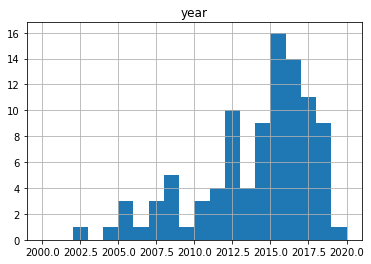

In [18]:
juegos.hist(column = 'year' , bins = 20 , range = (2000 , 2020))

In [19]:
juegos.sort_values(by = 'year' , ascending=True )

,name,year,geek_rating,average_rating,voters
71,Crokinole,1876,7.573,7.83,10457
75,Sherlock Holmes Consulting Detective: The Tham...,1981,7.555,7.77,14885
59,El Grande,1995,7.611,7.76,22208
77,Tigris & Euphrates,1997,7.548,7.70,24006
21,Puerto Rico,2002,7.901,8.02,59041
...,...,...,...,...,...
4,Brass: Birmingham,2018,8.216,8.63,10413
68,Teotihuacan: City of Gods,2018,7.577,7.96,8429
60,Rising Sun,2018,7.609,7.93,12999
65,Everdell,2018,7.582,8.01,8696


In [21]:
print(html)


<!DOCTYPE html>
<html ng-app="GeekApp" lang="en-US" ng-cloak>
<head>
	<meta charset='utf-8'>
	<meta id="vp" name="viewport" content="width=device-width, initial-scale=1.0">
			<script>
			window.addEventListener( 'DOMContentLoaded',  function() {
				if (window.innerWidth < 960) {
					var mvp = document.getElementById('vp');
					mvp.setAttribute('content','width=960');
				}
			});
		</script>
		<meta content='yes' name='apple-mobile-web-app-capable'>
	<meta content='IE=edge,chrome=1' http-equiv='X-UA-Compatible'>

			<title>Browse Board Games | BoardGameGeek</title>
	
	
<link rel="apple-touch-icon" 	href="https://cf.geekdo-static.com/icons/touch-icon180.png" />
<link rel="shortcut icon" 		href="https://cf.geekdo-static.com/icons/favicon2.ico" type="image/ico" />
<link rel="icon" 					href="https://cf.geekdo-static.com/icons/favicon2.ico" type="image/ico" />
<link rel="search" 				href="/game-opensearch.xml" type="application/opensearchdescription+xml" title="BGG Game Search" />
<me